In [93]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import itertools
df = pd.read_csv('CardioGoodFitness.csv')
df.head()


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [19]:
# What are the different types of vairables in the data? 
colums = df.columns 
types = [type(x) for x in df.iloc[0]]
mapping = {'object': 'Categorical', 'int64': 'Numerical', 'float64': 'Numberical'}
for col in df.columns:
    dtype = df[col].dtype 
    dtype_name = str(dtype)
    category = mapping.get(dtype_name, 'Unknown')
    print(f'{col}:, Type: {category}')

Product:, Type: Categorical
Age:, Type: Numerical
Gender:, Type: Categorical
Education:, Type: Numerical
MaritalStatus:, Type: Categorical
Usage:, Type: Numerical
Fitness:, Type: Numerical
Income:, Type: Numerical
Miles:, Type: Numerical


In [37]:
heights = df['Product'].value_counts()
heights.index.values

array(['TM195', 'TM498', 'TM798'], dtype=object)

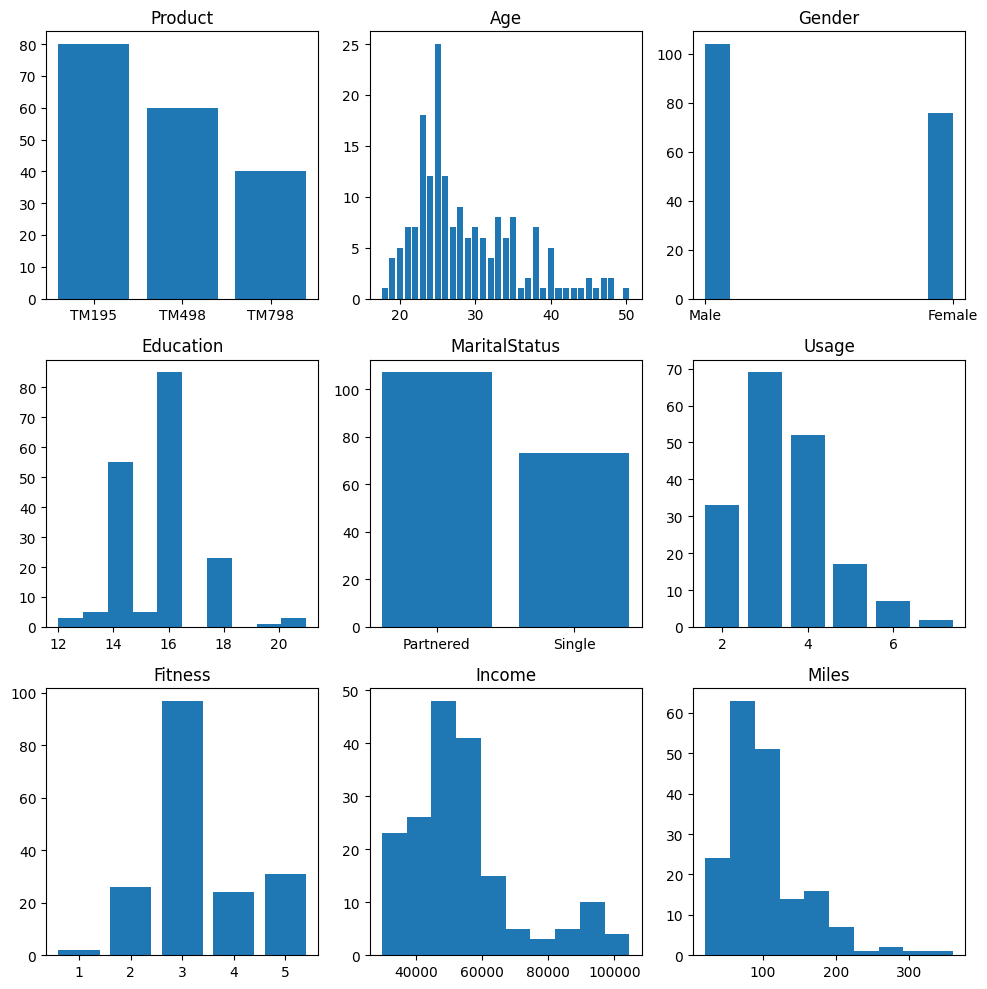

In [65]:
# what is the distribution of different variables in the data? 
columns = df.columns 
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.flatten()
for i in range(9):
    col = columns[i]
    if i in [0, 1, 4, 5, 6]:
        value_counts = df[col].value_counts()
        axes[i].bar(x=value_counts.index.values, height=value_counts.values)
    else:
        axes[i].hist(df[columns[i]])
    axes[i].set_title(columns[i])
plt.tight_layout()
plt.show()

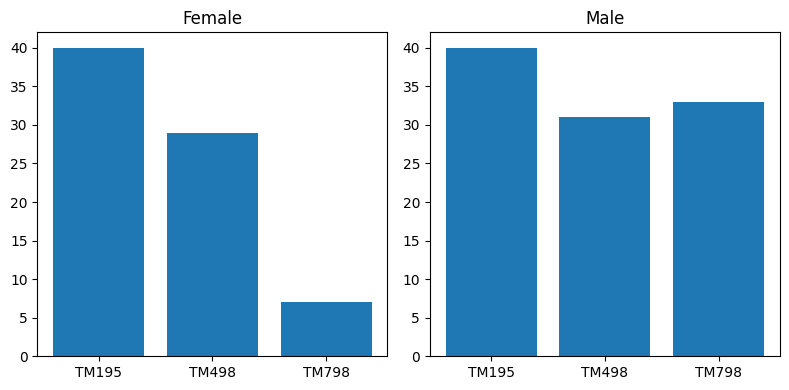

In [66]:
# which product is more popular amount males or females? 
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes = axes.flatten()
for i, (group, group_df) in enumerate(df.groupby('Gender')):
    value_counts = group_df['Product'].value_counts().sort_index()
    height = value_counts.values 
    x = value_counts.index.values
    axes[i].bar(height=height, x=x)
    axes[i].set_title(group)
plt.tight_layout()
plt.show()

In [64]:
df['MaritalStatus'].value_counts()

MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64

Text(0, 0.5, 'Proportion')

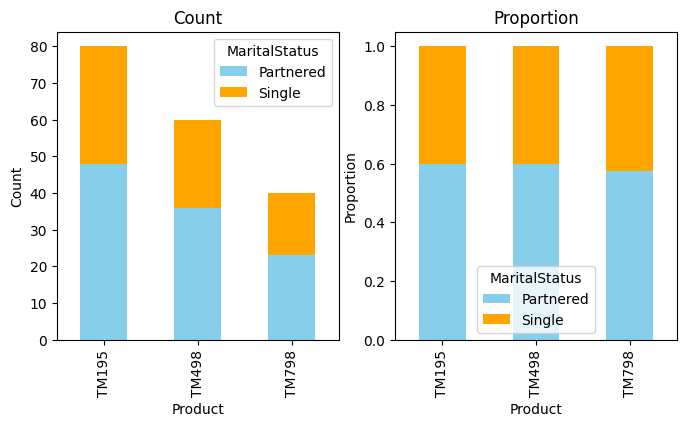

In [72]:
# Is the product purchase affected by the matriatal status of the customer? 
crosstab_normalize = pd.crosstab(df['Product'], df['MaritalStatus'], normalize='index')
crosstab = pd.crosstab(df['Product'], df['MaritalStatus'])
fig, axes = plt.subplots(1, 2, figsize=(4, 8))
axes = axes.flatten()
crosstab.plot(kind='bar', stacked=True, color=['skyblue', 'orange'], figsize=(8, 4), ax=axes[0])
axes[0].set_title('Count')
axes[0].set_xlabel('Product')
axes[0].set_ylabel('Count')

crosstab_normalize.plot(kind='bar', stacked=True, color=['skyblue', 'orange'], figsize=(8, 4), ax=axes[1])
axes[1].set_title('Proportion')
axes[1].set_xlabel('Product')
axes[1].set_ylabel('Proportion')


In [85]:
df.shape

(180, 9)

In [87]:
df['Age']

0      18
1      19
2      19
3      19
4      20
       ..
175    40
176    42
177    45
178    47
179    48
Name: Age, Length: 180, dtype: int64

In [102]:
results = []
for col1, col2 in itertools.combinations(cols, 2):
    corr = df[[col1, col2]].corr().iloc[0, 1]
    results.append((
        f'{col1}-{col2}', corr 
    ))
results.sort(key=lambda x: x[1], reverse=True)
for result in results:
    print(result[0], result[1])

Fitness-Miles 0.7857017433982374
Usage-Miles 0.7591304767293796
Usage-Fitness 0.668605568025629
Education-Income 0.6258273463351699
Income-Miles 0.54347325894583
Fitness-Income 0.5350053167686752
Usage-Income 0.5195372321137098
Age-Income 0.5134136851208337
Education-Fitness 0.4105807901304225
Education-Usage 0.3951552190809245
Education-Miles 0.30728428208077674
Age-Education 0.28049566694238387
Age-Fitness 0.06110454181384132
Age-Miles 0.03661756905827155
Age-Usage 0.015064469362853916


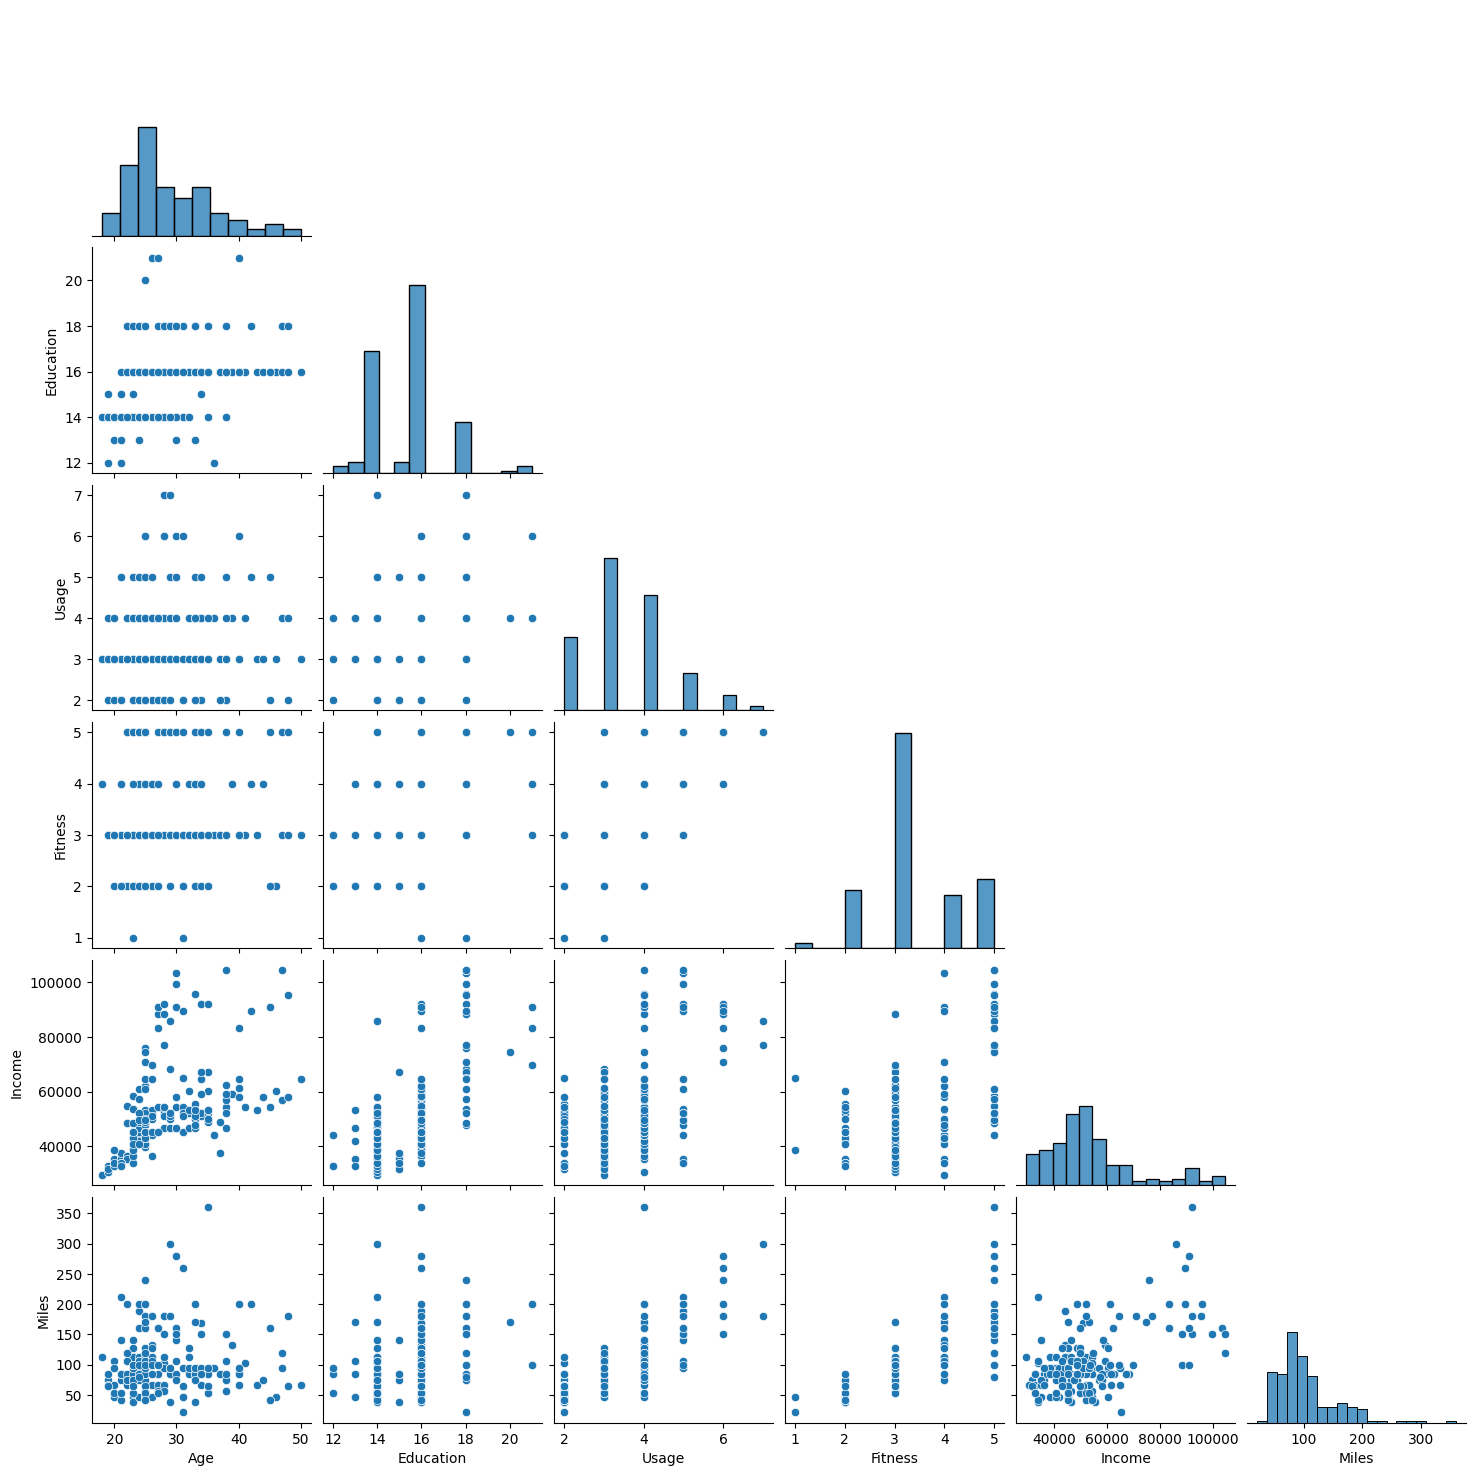

Fitness-Miles 0.7857017433982374
Usage-Miles 0.7591304767293796
Usage-Fitness 0.668605568025629
Education-Income 0.6258273463351699
Income-Miles 0.54347325894583
Fitness-Income 0.5350053167686752
Usage-Income 0.5195372321137098
Age-Income 0.5134136851208337
Education-Fitness 0.4105807901304225
Education-Usage 0.3951552190809245
Education-Miles 0.30728428208077674
Age-Education 0.28049566694238387
Age-Fitness 0.06110454181384132
Age-Miles 0.03661756905827155
Age-Usage 0.015064469362853916


In [103]:
# Is there a significatn correlation amount some of the variable? 
cols = df.select_dtypes(include=['int64']).columns
sns.pairplot(data=df[cols], corner=True)
plt.show()

results = []
for col1, col2 in itertools.combinations(cols, 2):
    corr = df[[col1, col2]].corr().iloc[0, 1]
    results.append((
        f'{col1}-{col2}', corr 
    ))
results.sort(key=lambda x: x[1], reverse=True)
for result in results:
    print(result[0], result[1])

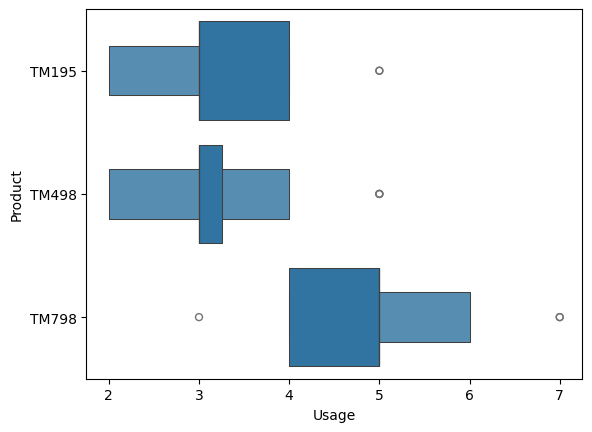

ValueError: could not convert string to float: 'TM195'

In [106]:
# What is the distribution of the average number of miles for each product 
sns.boxenplot(data=df, x='Usage', y='Product')
plt.show()
df.corr()